<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Walmart_Capstone_Project/blob/main/Capstone_Project_Final_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Wallmart**



---



## **Problem Statement**

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.


Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

1.   Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.

2.   Forecast the sales for each store for the next 12 weeks.

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the Dataset**

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat Capstone Project - Walmart/Walmart.csv")

**Understanding the Dataset**

In [21]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [20]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [19]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.035732e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.437811e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.412554e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df.shape

(6435, 8)


## **Data Preprocessing and Cleaning**

**Checking for Missing Values**

In [22]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Checking for Duplicates**

In [23]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates)
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool
Number of duplicates: 0


**Checking for Outliers**

In [24]:
# Calculate the first and third quartiles and IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Set the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

print(outliers)

# Count the number of outliers
count_outliers = len(outliers)

# Print the count of outliers
print("Count of Outliers:", count_outliers)


Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Count of Outliers: 0


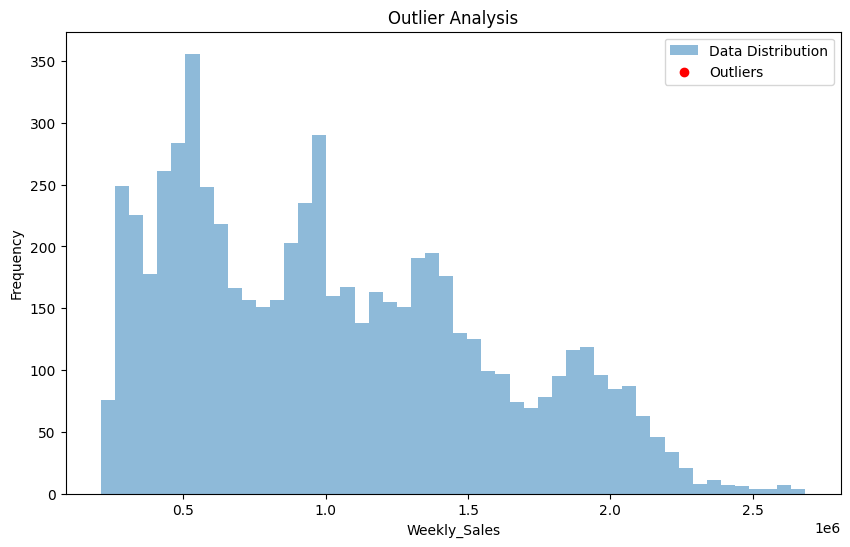

In [18]:
# Visualize the distribution and outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=50, alpha=0.5, label='Data Distribution')
plt.scatter(outliers.index, outliers['Weekly_Sales'], color='red', label='Outliers')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.title('Outlier Analysis')
plt.legend()
plt.show()

**Replacing Outliers with Median**

In [16]:
# Replace outliers with the median
median_value = df['Weekly_Sales'].median()
df['Weekly_Sales'] = np.where((df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound), median_value, df['Weekly_Sales'])
print(df)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

## **Exploratory Data Analysis**

**Univariate Analysis**

In [27]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [28]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [33]:
#Storewise Sales


# Assuming you have a DataFrame called "walmart_df" with columns "Store" and "Sales"

# Group the data by "Store" and calculate the sum of "Sales" for each store
storewise_sales = df.groupby('Store')['Weekly_Sales'].sum()

print(storewise_sales)


Store
1     2.224028e+08
2     2.706436e+08
3     5.758674e+07
4     2.867997e+08
5     4.547569e+07
6     2.219893e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.604826e+08
11    1.939628e+08
12    1.442872e+08
13    2.739669e+08
14    2.799706e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    2.867490e+08
21    1.081179e+08
22    1.470756e+08
23    1.969771e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.499602e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64


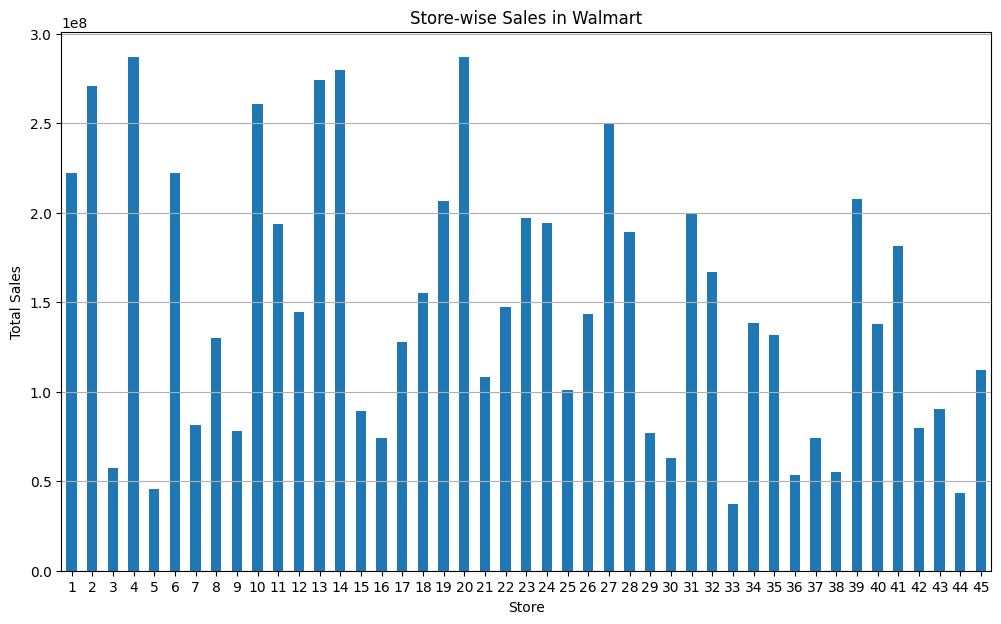

In [40]:

# Assuming you have a DataFrame called "walmart_df" with columns "Store" and "Sales"
# And you have already calculated the store-wise sales in the "storewise_sales" Series

# Plot the store-wise sales using a bar plot
plt.figure(figsize=(12, 7))
storewise_sales.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Store-wise Sales in Walmart')
plt.xticks(rotation=0)  # To show the store numbers as x-axis labels without rotation
plt.grid(axis='y')  # Add horizontal gridlines for better readability
plt.show()


In [35]:
# Find the average sales for each store
average_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Find the maximum sales for each store
max_sales = df.groupby('Store')['Weekly_Sales'].max()

# Find the minimum sales for each store
min_sales = df.groupby('Store')['Weekly_Sales'].min()

print(average_sales)


Store
1     1.555264e+06
2     1.892612e+06
3     4.027044e+05
4     2.005592e+06
5     3.180118e+05
6     1.552373e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.821557e+06
11    1.356383e+06
12    1.009002e+06
13    1.915853e+06
14    1.957836e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.005237e+06
21    7.560691e+05
22    1.028501e+06
23    1.377462e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.747974e+06
28    1.323522e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    3.857317e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64


ValueError: ignored

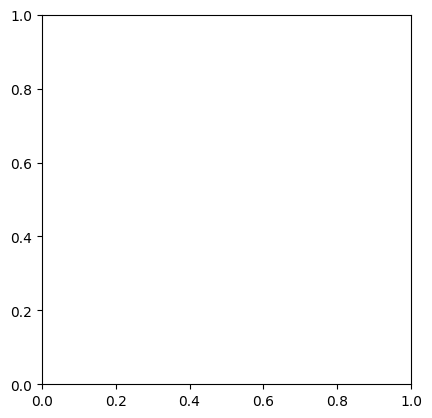

In [32]:
# Creating plot
fig, ax = plt.subplots()
plt.pie(df, labels = 'Weekly_Sales' ,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

**Year vs Fuel_price**

**Weekly sales vs Store**

**Store vs Unemployment**

**Correlation Map**

**Bivariate Analysis**

**Multivariate Analysis**